In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt

In [ ]:
# Splitting the data into features (X) and labels (Y)
my_data = genfromtxt('data.txt', delimiter='\t')

In [9]:
X = my_data[:,: 2]
Y = my_data[:,2]
print(X.shape)
print(Y.shape)

(100, 2)
(100,)


In [ ]:
# Function to split data into training and testing sets
def train_test_split (X, Y, testSize = 0.25):
  p = np.random.permutation(len(Y))
  X_shuffle = X[p]
  Y_shuffle = Y[p]
  n_rows = int(len(Y) * testSize)
  X_train = X_shuffle[n_rows : , :]
  Y_train = Y_shuffle[n_rows :]
  X_test = X_shuffle[: n_rows , :]
  Y_test = Y_shuffle[: n_rows]
  return X_train, Y_train, X_test, Y_test

In [ ]:
# Perform the train-test split
X_train, Y_train, X_test, Y_test = train_test_split(X,Y, testSize = .20)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(80, 2)
(80,)
(20, 2)
(20,)


In [ ]:
# Function to normalize features for better numerical stability and model performance
def normalization(X_train, X_test):
  mean_train = np.mean(X_train)
  std_train = np.std(X_train)
  # Normalize training and testing sets
  X_train_normalized = (X_train - mean_train) / std_train
  X_test_normalized = (X_test - mean_train) / std_train
  return X_train_normalized, X_test_normalized

In [ ]:
# Normalize the data
X_train_normalized, X_test_normalized = normalization(X_train, X_test)
print(np.mean(X_train_normalized))
print(np.std(X_train_normalized))
print(np.mean(X_test_normalized))
print(np.std(X_test_normalized))

-3.053113317719181e-17
1.0
-0.20255173992909636
0.9646567362420518


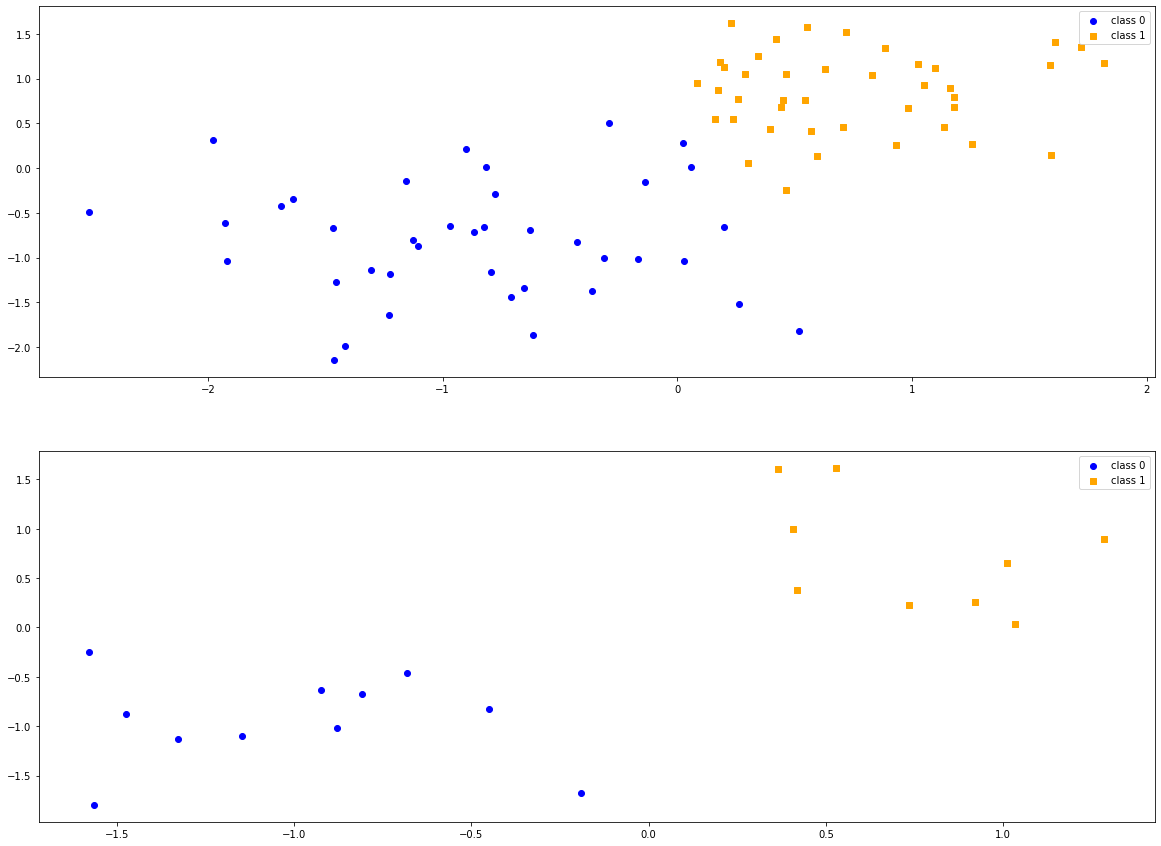

In [ ]:
fig, ax = plt.subplots(2,1,figsize = (20,15))
Y_train_0 = np.where(Y_train == 0)[0]
Y_train_1 = np.where(Y_train == 1)[0]
# Scatter plot for training set
ax[0].scatter(X_train_normalized[Y_train_0,0], X_train_normalized[Y_train_0,1], c = "blue", label = "class 0")
ax[0].scatter(X_train_normalized[Y_train_1,0], X_train_normalized[Y_train_1,1], c = "orange", label = "class 1", marker = "s")
ax[0].legend()

# Repeat for the testing set
Y_test_0 = np.where(Y_test == 0)[0]
Y_test_1 = np.where(Y_test == 1)[0]
ax[1].scatter(X_test_normalized[Y_test_0,0], X_test_normalized[Y_test_0,1], c = "blue", label = "class 0")
ax[1].scatter(X_test_normalized[Y_test_1,0], X_test_normalized[Y_test_1,1], c = "orange", label = "class 1", marker = "s")
ax[1].legend()

In [ ]:
from matplotlib.mathtext import Forward
# Class definition for the Perceptron model
class Perceptron():
  def __init__(self, num_features) :
    # Initialize weights and bias with small random values
    self.num_features = num_features
    self.weights = np.random.uniform(low = -.05, high = 0.05, size = (num_features))
    self.bias = 0 
  def forward(self, x):
    # Compute the linear combination of weights and features
    linear = np.dot(x, self.weights) + self.bias
    predictions = [0 if linear < 0 else 1 ]
    # Return binary predictions (0 or 1)
    return predictions
  def backward(self, x, y, predictions) :
    # Compute the error between the actual and predicted labels
    errors = y - predictions
    return errors
  def train(self, x, y, epochs) :
    # Train the model for a specified number of epochs
    for e in range (epochs) :
      sum_error = 0
      for i in range (y.shape[0]) :
        predictions = self.forward(x[i])
        errors = self.backward(x[i], y[i], predictions)
        sum_error += errors
        # Update weights and bias based on the error
        self.weights = self.weights + .001 * errors * x[i] 
        self.bias = self.bias + .001 * errors 
  def evaluate(self, x, y) :
    # Evaluate the model on a dataset
    linear = np.dot(x, self.weights) + self.bias
    predictions = [0 if i < 0 else 1 for i in linear]
    # Calculate accuracy as the percentage of correct predictions
    correct = 0
    for i in range(len(y)):
      if y[i] == predictions[i]:
        correct += 1

    accuracy = correct / len(y)
    return accuracy

In [ ]:
# Initialize the Perceptron model with the number of features
nn_perceptron = Perceptron(X_train_normalized.shape[1])
print(nn_perceptron.weights)

[ 0.02629872 -0.02251463]


In [ ]:
# Train the Perceptron for 5 epochs
nn_perceptron.train(X_train_normalized, Y_train, 5)


In [ ]:
# Print final weights and bias after training
print(nn_perceptron.weights)
print(nn_perceptron.bias)


[0.02717864 0.00602227]
[-0.007]


In [ ]:
# Evaluate the model on the testing set
nn_perceptron.evaluate(X_train_normalized, Y_train)

1.0

In [119]:
nn_perceptron.evaluate(X_test_normalized, Y_test)

1.0

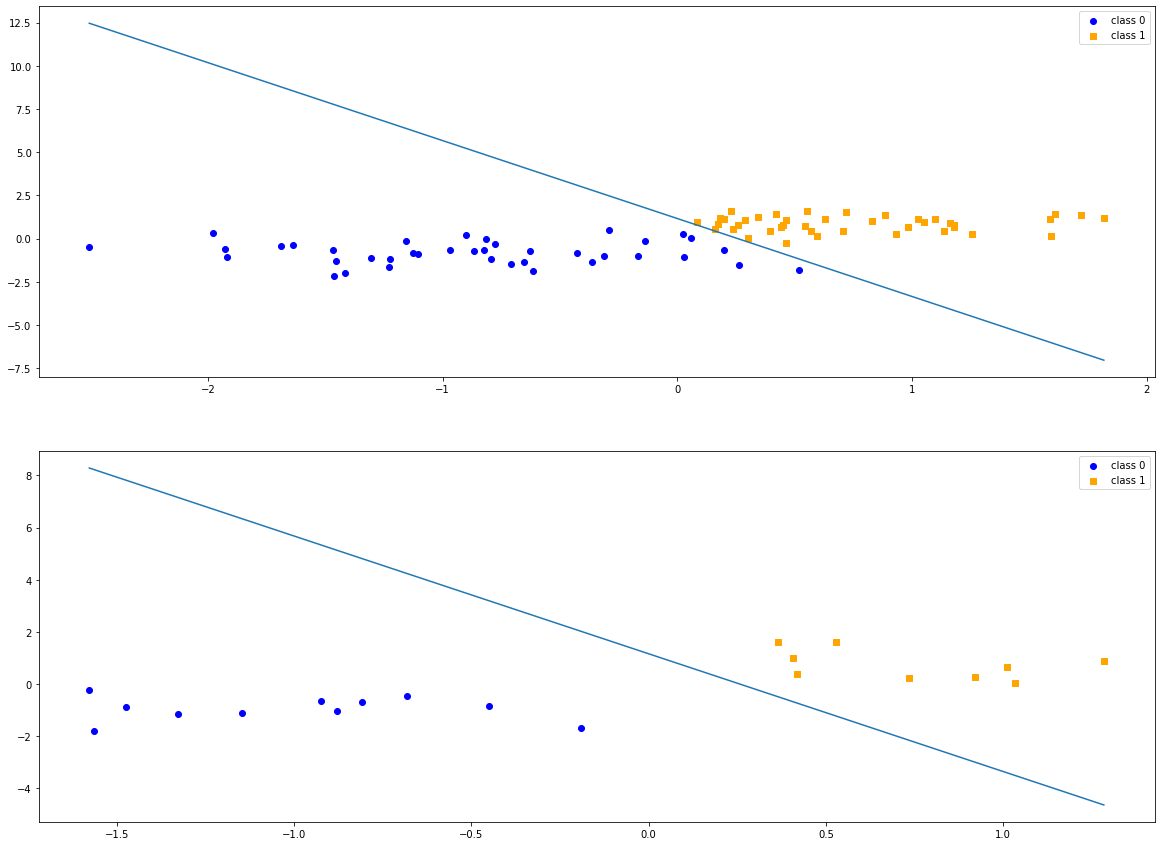

In [ ]:
# Visualize the decision boundary on the training and testing sets
x1 = [min(X_train_normalized[:,0]),max(X_train_normalized[:,0])]
x2 = -(nn_perceptron.bias / nn_perceptron.weights[1]) / (nn_perceptron.bias / nn_perceptron.weights[0]) * x1 + (-nn_perceptron.bias / nn_perceptron.weights[1])        
fig, ax = plt.subplots(2,1,figsize = (20,15))
Y_train_0 = np.where(Y_train == 0)[0]
Y_train_1 = np.where(Y_train == 1)[0]
# Plot decision boundary and training data
ax[0].scatter(X_train_normalized[Y_train_0,0], X_train_normalized[Y_train_0,1], c = "blue", label = "class 0")
ax[0].scatter(X_train_normalized[Y_train_1,0], X_train_normalized[Y_train_1,1], c = "orange", label = "class 1", marker = "s")
ax[0].plot(x1,x2)
ax[0].legend()

# Repeat for the testing set
x1 = [min(X_test_normalized[:,0]),max(X_test_normalized[:,0])]
x2 = -(nn_perceptron.bias / nn_perceptron.weights[1]) / (nn_perceptron.bias / nn_perceptron.weights[0]) * x1 + (-nn_perceptron.bias / nn_perceptron.weights[1]) 
Y_test_0 = np.where(Y_test == 0)[0]
Y_test_1 = np.where(Y_test == 1)[0]
ax[1].scatter(X_test_normalized[Y_test_0,0], X_test_normalized[Y_test_0,1], c = "blue", label = "class 0")
ax[1].scatter(X_test_normalized[Y_test_1,0], X_test_normalized[Y_test_1,1], c = "orange", label = "class 1", marker = "s")
ax[1].plot(x1,x2)
ax[1].legend()

After implementing the Perceptron algorithm, I tested its ability to classify data points into two distinct classes. The dataset, loaded from a file, was divided into features (X) and labels (Y) and split into training and testing sets using a custom function. I normalized the data to ensure the feature ranges were standardized, a crucial step to ensure that the Perceptron algorithm converges effectively. Visualization of the normalized data showed clear separation between the two classes, confirming that the dataset was well-suited for binary classification.

The Perceptron model was implemented with forward, backward, and training methods. During training, the model iteratively adjusted its weights and bias based on the classification errors, with the goal of minimizing the error across the dataset. After training for five epochs, the Perceptron achieved 100% accuracy on both the training and testing datasets. This result demonstrated the model's effectiveness in correctly classifying the data points based on their features.

To better understand the decision boundary learned by the Perceptron, I visualized the boundary alongside the data points. The boundary clearly separated the two classes, reinforcing the model's ability to learn a linear decision boundary. While the results were highly accurate for this dataset, the Perceptron's performance is limited to linearly separable data. For more complex datasets, nonlinear classifiers or kernel-based methods would be necessary. Overall, this implementation and analysis highlighted the strengths of the Perceptron in handling binary classification tasks with linearly separable data.